In [7]:
import torch
import torch.optim as optim
from torchvision import utils
from torchvision import transforms, datasets
import torch.nn.functional as F
import torch.nn as nn
import os
import sys
cwd = os.getcwd()
#add CIFAR10 data in the environment
sys.path.append(cwd + '/../cifar10')
#from Cifar10Dataloader import CIFAR10
batch_size = 4
"""
def load_data():

    #convert the images to tensor and normalized them
    transform = transforms.Compose([
         transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])

    trainset = CIFAR10(root='../cifar10',  transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              shuffle=False, num_workers=1)
    return trainloader

    def load_data():
    BATCH_SIZE = 4
    train_dataset = datasets.CIFAR10(root="./data/",
                                    train=True,
                                    download=True,
                                    transform=transforms.ToTensor())
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                               batch_size=BATCH_SIZE,
                                               shuffle=True)
    return train_loader
"""
def load_data():
    BATCH_SIZE = 4
    train_dataset = datasets.CIFAR10(root="./data/",
                                    train=True,
                                    download=True,
                                    transform=transforms.ToTensor())
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                               batch_size=BATCH_SIZE,
                                               shuffle=True)
    return train_loader
print('start')
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        self.features =16
        # encoder
        self.enc1 = nn.Linear(in_features=3072, out_features=128)
        self.enc2 = nn.Linear(in_features=128, out_features=self.features * 2)

        # decoder
        self.dec1 = nn.Linear(in_features=self.features, out_features=128)
        self.dec2 = nn.Linear(in_features=128, out_features=3072)

    def forward(self, x):
        # encoding
        x = F.relu(self.enc1(x))
        x = self.enc2(x).view(-1, 2, self.features)
        # get `mu` and `log_var`
        mu = x[:, 0, :]  # the first feature values as mean
        log_var = x[:, 1, :]  # the other feature values as variance
        # get the latent vector through reparameterization
        z = self.reparameterize(mu, log_var)

        # decoding
        x = F.relu(self.dec1(z))
        reconstruction = torch.sigmoid(self.dec2(x))
        return reconstruction, mu, log_var

    def reparameterize(self, mu, log_var):
        """
        :param mu: mean from the encoder's latent space
        :param log_var: log variance from the encoder's latent space
        """
        std = torch.exp(0.5 * log_var)  # standard deviation
        eps = torch.randn_like(std)  # generate sample of the same size
        sample = mu + (eps * std)  # sampling as if coming from the input space
        return sample

def final_loss(bce_loss, mu, logvar):
    """
    This function will add the reconstruction loss (BCELoss) and the
    KL-Divergence.
    KL-Divergence = 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    :param bce_loss: recontruction loss
    :param mu: the mean from the latent vector
    :param logvar: log variance from the latent vector
    """
    BCE = bce_loss
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

def train(model,training_data):

    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.BCELoss(reduction='sum')

    running_loss = 0.0

    for epoch in range(1):  # loop over the dataset multiple times

        for i, data in enumerate(training_data, 0):
            inputs, _ = data
            inputs = inputs.view(inputs.size(0), -1)

            optimizer.zero_grad()
            reconstruction, mu, logvar = model(inputs)
            bce_loss = criterion(reconstruction, inputs)
            loss = final_loss(bce_loss, mu, logvar)
            running_loss += loss.item()
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:  # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0

    PATH = './cifar_net.pth'
    torch.save(model.state_dict(), PATH)

    print('Finished Training')
model = VAE()
training_data = load_data()
x = train(model,training_data)
print('done')

start
Files already downloaded and verified
[1,  2000] loss: 15751.770
[1,  4000] loss: 15267.637
[1,  6000] loss: 15196.987
[1,  8000] loss: 15154.272
[1, 10000] loss: 15141.043
[1, 12000] loss: 15176.480
Finished Training
done


Using Device: cuda


100%|██████████| 26421880/26421880 [00:01<00:00, 15448593.50it/s]


Extracting ./.data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./.data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 276459.30it/s]


Extracting ./.data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./.data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5106651.77it/s]


Extracting ./.data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./.data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 8534496.83it/s]


Extracting ./.data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./.data/FashionMNIST/raw

[Epoch 1]


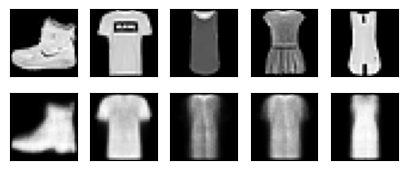

[Epoch 2]


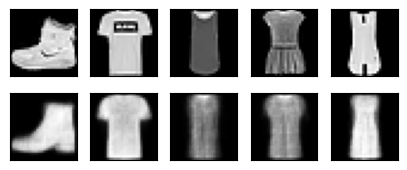

[Epoch 3]


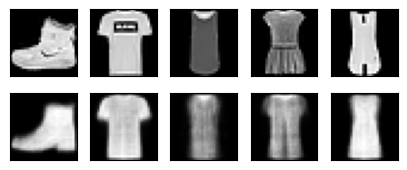

[Epoch 4]


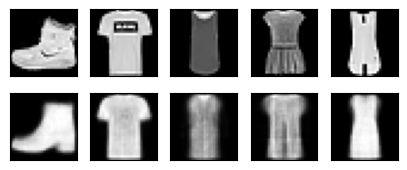

[Epoch 5]


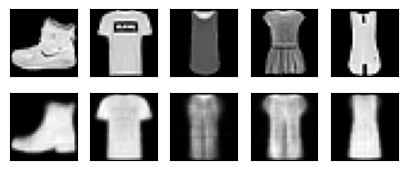

[Epoch 6]


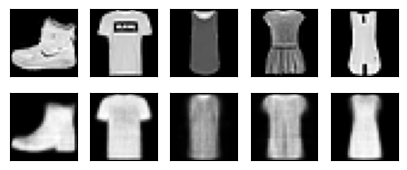

[Epoch 7]


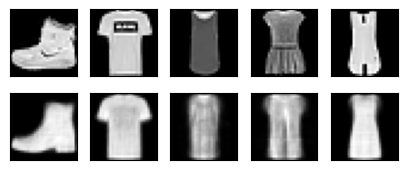

[Epoch 8]


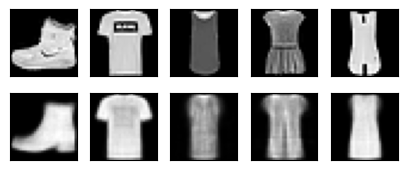

[Epoch 9]


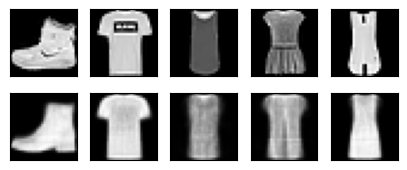

[Epoch 10]


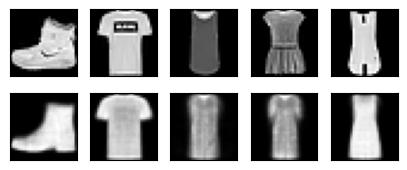

<Figure size 1000x800 with 0 Axes>

In [ ]:
import torch
import torchvision
import torch.nn.functional as F
from torch import nn, optim
from torchvision import transforms, datasets

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #생성되는 이미지를 관찰하기 위함입니다. 3차원 플롯을 그리는 용도입니다.
from matplotlib import cm # 데이터포인트에 색상을 입히는 것에 사용됩니다.
import numpy as np

EPOCH = 10
BATCH_SIZE = 64
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
print("Using Device:", DEVICE)

# Fashion MNIST 데이터셋 불러오기 (학습데이터만 사용)
trainset = datasets.FashionMNIST(
    root      = './.data/',
    train     = True,
    download  = True,
    transform = transforms.ToTensor()
)
train_loader = torch.utils.data.DataLoader(
    dataset     = trainset,
    batch_size  = BATCH_SIZE,
    shuffle     = True,
    num_workers = 2
)

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        #인코더는 간단한 신경망으로 분류모델처럼 생겼습니다.
        self.encoder = nn.Sequential( # nn.Sequential을 사용해 encoder와 decoder 두 모듈로 묶어줍니다.
            nn.Linear(28*28, 128), #차원을 28*28에서 점차 줄여나갑니다.
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3),   # 입력의 특징을 3차원으로 압축합니다 (출력값이 바로 잠재변수가 됩니다.)
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12), #디코더는 차원을 점차 28*28로 복원합니다.
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),       # 픽셀당 0과 1 사이로 값을 출력하는 sigmoid()함수를 추가합니다.
        )

    def forward(self, x):
        encoded = self.encoder(x) # encoder는 encoded라는 잠재변수를 만들고
        decoded = self.decoder(encoded) # decoder를 통해 decoded라는 복원이미지를 만듭니다.
        return encoded, decoded

autoencoder = Autoencoder().to(DEVICE)
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.005)
# Adam()을 최적화함수로 사용합니다. Adam은 SGD의 변형함수이며 학습중인 기울기를 참고하여 학습 속도를 자동으로 변화시킵니다.
criterion = nn.MSELoss() #원본값과 디코더에서 나온 값의 차이를 계산하기 위해 평균제곱오차(Mean Squared Loss) 오차함수를 사용합니다.

# 원본 이미지를 시각화 하기 (첫번째 열)
view_data = trainset.data[:5].view(-1, 28*28)
# 복원이 어떻게 되는지 관찰하기 위해 5개의 이미지를 가져와 바로 넣어보겠습니다.
view_data = view_data.type(torch.FloatTensor)/255.
#픽셀의 색상값이 0~255이므로 모델이 인식하는 0부터 1사이의 값으로 만들기 위해 255로 나눠줍니다.

# 학습하기 위한 함수
def train(autoencoder, train_loader):
    autoencoder.train()
    for step, (x, label) in enumerate(train_loader):
        x = x.view(-1, 28*28).to(DEVICE)
        y = x.view(-1, 28*28).to(DEVICE) #x(입력)와 y(대상 레이블)모두 원본이미지(x)인 것을 주의해야 합니다.
        label = label.to(DEVICE)

        encoded, decoded = autoencoder(x)

        loss = criterion(decoded, y) # decoded와 원본이미지(y) 사이의 평균제곱오차를 구합니다
        optimizer.zero_grad() #기울기에 대한 정보를 초기화합니다.
        loss.backward() # 기울기를 구합니다.
        optimizer.step() #최적화를 진행합니다.

#학습하기
for epoch in range(1, EPOCH+1):
    train(autoencoder, train_loader)

    # 디코더에서 나온 이미지를 시각화 하기
    # 앞서 시각화를 위해 남겨둔 5개의 이미지를 한 이폭만큼 학습을 마친 모델에 넣어 복원이미지를 만듭니다.
    test_x = view_data.to(DEVICE)
    _, decoded_data = autoencoder(test_x)

    # 원본과 디코딩 결과 비교해보기
    f, a = plt.subplots(2, 5, figsize=(5, 2))
    print("[Epoch {}]".format(epoch))
    for i in range(5):
        img = np.reshape(view_data.data.numpy()[i],(28, 28)) #파이토치 텐서를 넘파이로 변환합니다.
        a[0][i].imshow(img, cmap='gray')
        a[0][i].set_xticks(()); a[0][i].set_yticks(())

    for i in range(5):
        img = np.reshape(decoded_data.to("cpu").data.numpy()[i], (28, 28))
        # CUDA를 사용하면 모델 출력값이 GPU에 남아있으므로 .to("cpu") 함수로 일반메모리로 가져와 numpy행렬로 변환합니다.
        # cpu를 사용할때에도 같은 코드를 사용해도 무방합니다.
        a[1][i].imshow(img, cmap='gray')
        a[1][i].set_xticks(()); a[1][i].set_yticks(())
    plt.show()



view_data = trainset.data[:200].view(-1, 28*28) #원본이미지 200개를 준비합니다
view_data = view_data.type(torch.FloatTensor)/255.
test_x = view_data.to(DEVICE)
encoded_data, _ = autoencoder(test_x)
encoded_data = encoded_data.to("cpu")

CLASSES = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)

X = encoded_data.data[:, 0].numpy()
Y = encoded_data.data[:, 1].numpy()
Z = encoded_data.data[:, 2].numpy() #잠재변수의 각 차원을 numpy행렬로 변환합니다.

labels = trainset.targets[:200].numpy() #레이블도 넘파이행렬로 변환합니다.

for x, y, z, s in zip(X, Y, Z, labels): #zip()은 같은 길이의 행렬들을 모아 순서대로 묶어줍니다.
    name = CLASSES[s]
    color = cm.rainbow(int(255*s/9))
    ax.text(x, y, z, name, backgroundcolor=color)

ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_zlim(Z.min(), Z.max())
plt.show()




Using Device: cuda
이폭 [0/30] d_loss:0.2066 g_loss: 6.2320 D(x):0.95 D(G(z)):0.07
이폭 [1/30] d_loss:0.3198 g_loss: 5.4823 D(x):0.87 D(G(z)):0.05
이폭 [2/30] d_loss:0.3834 g_loss: 3.3861 D(x):0.92 D(G(z)):0.19
이폭 [3/30] d_loss:0.3591 g_loss: 4.5349 D(x):0.87 D(G(z)):0.08
이폭 [4/30] d_loss:0.5770 g_loss: 2.9506 D(x):0.85 D(G(z)):0.16
이폭 [5/30] d_loss:0.5336 g_loss: 2.9082 D(x):0.82 D(G(z)):0.12
이폭 [6/30] d_loss:0.8792 g_loss: 2.2496 D(x):0.76 D(G(z)):0.22
이폭 [7/30] d_loss:0.8061 g_loss: 2.6523 D(x):0.77 D(G(z)):0.20
이폭 [8/30] d_loss:0.6771 g_loss: 2.1086 D(x):0.80 D(G(z)):0.22
이폭 [9/30] d_loss:0.8603 g_loss: 1.8099 D(x):0.79 D(G(z)):0.29
이폭 [10/30] d_loss:1.0315 g_loss: 2.4393 D(x):0.62 D(G(z)):0.20
이폭 [11/30] d_loss:0.7774 g_loss: 2.0382 D(x):0.78 D(G(z)):0.26
이폭 [12/30] d_loss:0.6163 g_loss: 2.0383 D(x):0.79 D(G(z)):0.21
이폭 [13/30] d_loss:0.7747 g_loss: 1.5884 D(x):0.77 D(G(z)):0.30
이폭 [14/30] d_loss:0.9133 g_loss: 1.7021 D(x):0.68 D(G(z)):0.29
이폭 [15/30] d_loss:0.7632 g_loss: 1.4701 D(x):0

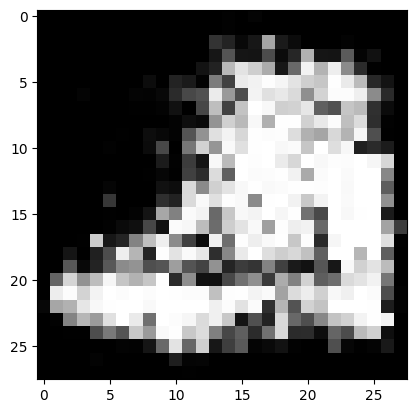

In [ ]:
import torch
import torchvision
import torch.nn.functional as F
from torch import nn, optim
from torchvision import transforms, datasets

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #생성되는 이미지를 관찰하기 위함입니다. 3차원 플롯을 그리는 용도입니다.
from matplotlib import cm # 데이터포인트에 색상을 입히는 것에 사용됩니다.
import numpy as np

# 하이퍼파라미터 설정 (EPOCHS만 300으로 변경, 나머지는 위와 동일)
EPOCHS = 30
BATCH_SIZE = 100
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
print("Using Device:", DEVICE)

# Fashion MNIST 데이터셋
trainset = datasets.FashionMNIST(
    './.data',
    train=True,
    download=True,
    transform=transforms.Compose([
       transforms.ToTensor(),
       transforms.Normalize((0.5,), (0.5,))
    ])
)
train_loader = torch.utils.data.DataLoader(
    dataset     = trainset,
    batch_size  = BATCH_SIZE,
    shuffle     = True
)

# 생성자 (Generator)
class Generator(nn.Module):
    def __init__(self):
        super().__init__()

        self.embed = nn.Embedding(10, 10)

        self.model = nn.Sequential(
            nn.Linear(110, 256), # 첫 계층은 무작위 텐서(z)의 크기 100과 레이블에 관한 정보 10개로 110개입니다.
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 784),
            nn.Tanh()
        )

    def forward(self, z, labels):
        c = self.embed(labels) # embed()함수는 '배치 x 1'크기의 레이블 텐서를 받아 '배치 x 10'의 연속적 텐서로 전환합니다
        x = torch.cat([z, c], 1) # 파이토치의 cat()함수는 두 벡터를 이어붙이는 연산을 실행합니다
        return self.model(x)

# 판별자 (Discriminator)
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.embed = nn.Embedding(10, 10)

        self.model = nn.Sequential(
            nn.Linear(794, 1024), #판별자도 이미지크기 784에 10을 더해줍니다
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3), #성능을 늘리기 위해 Dropout()계층을 추가했습니다
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid() # 마지막 계층인 Sigmoid()를 거쳐 각각 가짜와 진짜를 뜻하는 0과 1사이를 반환합니다
        )

    def forward(self, x, labels):
        c = self.embed(labels)
        x = torch.cat([x, c], 1)
        return self.model(x)

# 모델 인스턴스를 만들고 모델의 가중치를 지정한 장치로 보내기
D = Discriminator().to(DEVICE)
G = Generator().to(DEVICE)

# 이진 교차 엔트로피 함수와
# 생성자와 판별자를 최적화할 Adam 모듈
criterion = nn.BCELoss()
d_optimizer = optim.Adam(D.parameters(), lr =0.0002)
g_optimizer = optim.Adam(G.parameters(), lr =0.0002)

total_step = len(train_loader)
for epoch in range(EPOCHS):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(BATCH_SIZE, -1).to(DEVICE)

        # '진짜'와 '가짜' 레이블 생성
        real_labels = torch.ones(BATCH_SIZE, 1).to(DEVICE)
        fake_labels = torch.zeros(BATCH_SIZE, 1).to(DEVICE)

        # 판별자가 진짜 이미지를 진짜로 인식하는 오차 계산 (데이터셋 레이블 입력)
        labels = labels.to(DEVICE)
        outputs = D(images, labels)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs

        # 무작위 텐서와 무작위 레이블을 생성자에 입력해 가짜 이미지 생성
        z = torch.randn(BATCH_SIZE, 100).to(DEVICE)
        g_label = torch.randint(0, 10, (BATCH_SIZE,)).to(DEVICE)
        # torch.randint()로 0과 10사이의 '배치 x 1'크기의 텐서를 만들어 g_label로 지정
        fake_images = G(z, g_label) # z와 g_label을 생성자에 입력해 g_rabel과 생성물의 관계성 학습

        # 판별자가 가짜 이미지를 가짜로 인식하는 오차 계산
        outputs = D(fake_images, g_label)
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs

        # 진짜와 가짜 이미지를 갖고 낸 오차를 더해서 판별자의 오차 계산
        d_loss = d_loss_real + d_loss_fake

        # 역전파 알고리즘으로 판별자 모델의 학습을 진행
        d_optimizer.zero_grad()
        g_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()

        # 생성자가 판별자를 속였는지에 대한 오차 계산(무작위 레이블 입력)
        fake_images = G(z, g_label)
        outputs = D(fake_images, g_label)
        g_loss = criterion(outputs, real_labels)

        # 역전파 알고리즘으로 생성자 모델의 학습을 진행
        d_optimizer.zero_grad()
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()

    print('이폭 [{}/{}] d_loss:{:.4f} g_loss: {:.4f} D(x):{:.2f} D(G(z)):{:.2f}'
          .format(epoch,
                  EPOCHS,
                  d_loss.item(),
                  g_loss.item(),
                  real_score.mean().item(),
                  fake_score.mean().item()))

# 만들고 싶은 아이템 생성하고 시각화하기
item_number = 9 # 아이템 번호 (9번은 부츠)
z = torch.randn(1, 100).to(DEVICE) # 배치 크기 1
g_label = torch.full((1,), item_number, dtype=torch.long).to(DEVICE)
# torch.full()은 새로운 텐서를 만드는 함수로 첫 번째 인수로 텐서의 크기, 두 번째 인수로 텐서 원소들을 초기화할 값을 받아
# g_label이라는 1차원 텐서를 생성합니다. g_label 텐서는 아까 지정한 아이템 번호를 담고 있습니다.
sample_images = G(z, g_label) #이미지 생성

sample_images_img = np.reshape(sample_images.data.cpu().numpy() # 시각화를 위해 넘파이 행렬로 변환
                               [0],(28, 28))
plt.imshow(sample_images_img, cmap = 'gray')
plt.show()


Files already downloaded and verified
Epoch: [0/1], Batch Num: [0/12500]
Discriminator Loss: 1.3711, Generator Loss: 0.6946
D(x): 0.5103, D(G(z)): 0.5026
------------------------------
Epoch: [0/1], Batch Num: [50/12500]
Discriminator Loss: 0.5300, Generator Loss: 1.5926
D(x): 0.7963, D(G(z)): 0.2539
------------------------------
Epoch: [0/1], Batch Num: [100/12500]
Discriminator Loss: 0.7278, Generator Loss: 1.5119
D(x): 0.7609, D(G(z)): 0.3456
------------------------------
Epoch: [0/1], Batch Num: [150/12500]
Discriminator Loss: 0.2542, Generator Loss: 1.7390
D(x): 0.9631, D(G(z)): 0.1925
------------------------------
Epoch: [0/1], Batch Num: [200/12500]
Discriminator Loss: 0.4033, Generator Loss: 2.0236
D(x): 0.9467, D(G(z)): 0.2908
------------------------------
Epoch: [0/1], Batch Num: [250/12500]
Discriminator Loss: 0.3523, Generator Loss: 1.1827
D(x): 0.9937, D(G(z)): 0.2805
------------------------------
Epoch: [0/1], Batch Num: [300/12500]
Discriminator Loss: 0.6651, Genera

NameError: ignored

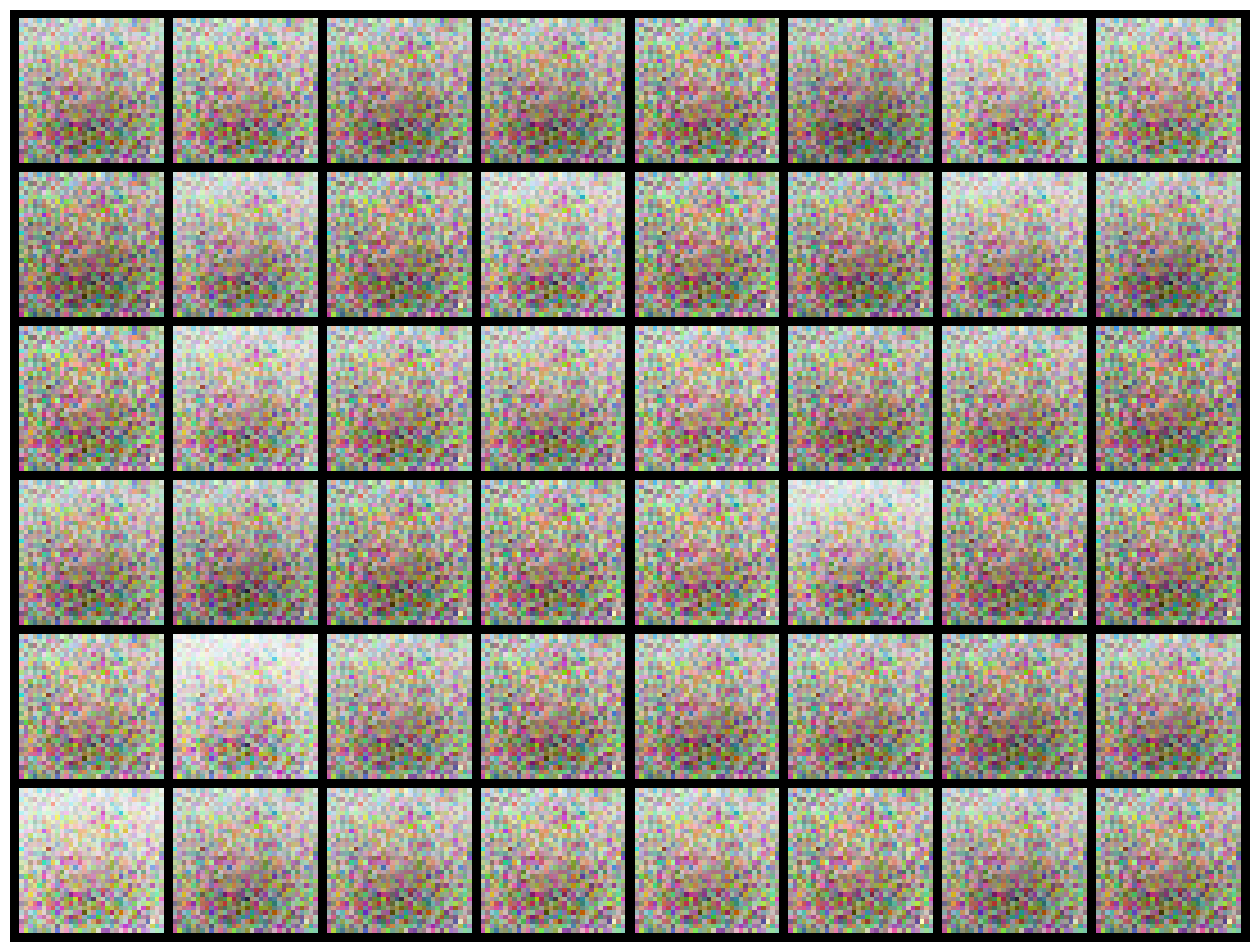

In [ ]:
import os
import sys
cwd = os.getcwd()
#add CIFAR10 data in the environment
sys.path.append(cwd + '/../cifar10')

#Numpy is linear algebra lbrary
import numpy as np
# Matplotlib is a visualizations library
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torchvision import utils
from torchvision import transforms ,datasets
import torchvision.utils as vutils

#CIFAR10 is a custom Dataloader that loads a subset ofthe data from a local folder
#from Cifar10Dataloader import CIFAR10

def load_data():
    BATCH_SIZE = 4
    train_dataset = datasets.CIFAR10(root="./data/",
                                    train=True,
                                    download=True,
                                    transform=transforms.ToTensor())
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                               batch_size=BATCH_SIZE,
                                               shuffle=True)
    return train_loader

def vectors_to_images(vectors):
    return vectors.view(vectors.size(0), 3, 32, 32)

def noise(size):
    '''
    Generates a 1-d vector of gaussian sampled random values
    '''
    n = Variable(torch.randn(size, 100))
    return n

def log_images(images, num_images, format='NCHW', normalize=True):
    '''
    input images are expected in format (NCHW)
    '''
    if type(images) == np.ndarray:
        images = torch.from_numpy(images)

    if format == 'NHWC':
        images = images.transpose(1, 3)



    # Make horizontal grid from image tensor
    horizontal_grid = vutils.make_grid(
        images, normalize=normalize, scale_each=True)
    # Make vertical grid from image tensor
    nrows = int(np.sqrt(num_images))
    grid = vutils.make_grid(
        images, nrow=nrows, normalize=True, scale_each=True)


    fig = plt.figure(figsize=(16, 16))
    plt.imshow(np.moveaxis(horizontal_grid.numpy(), 0, -1))
    plt.axis('off')
    if plot_horizontal:
        display.display(plt.gcf())
    plt.show()

class DiscriminatorNet(torch.nn.Module):
    """
    A three hidden-layer discriminative neural network
    """

    def __init__(self):
        super(DiscriminatorNet, self).__init__()
        n_features = 3072
        n_out = 1

        self.hidden0 = nn.Sequential(
            nn.Linear(n_features, 1024),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        self.hidden1 = nn.Sequential(
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        self.out = nn.Sequential(
            torch.nn.Linear(256, n_out),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x

class GeneratorNet(torch.nn.Module):
    """
    A three hidden-layer generative neural network
    """

    def __init__(self):
        super(GeneratorNet, self).__init__()
        n_features = 100
        n_out = 3072

        self.hidden0 = nn.Sequential(
            nn.Linear(n_features, 256),
            nn.ReLU()
        )
        self.hidden1 = nn.Sequential(
            nn.Linear(256, 512),
            nn.ReLU()
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(512, 1024),
            nn.ReLU()
        )

        self.out = nn.Sequential(
            nn.Linear(1024, n_out),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x

def train_discriminator(discriminator, optimizer, real_data, fake_data, loss):
    N = real_data.size(0)
    # Reset gradients
    optimizer.zero_grad()

    # Train on Real Data
    prediction_real = discriminator(real_data)
    # Calculate error and backpropagate
    error_real = loss(prediction_real, Variable(torch.ones(N, 1)))
    error_real.backward()

    # Train on Fake Data
    prediction_fake = discriminator(fake_data)
    # Calculate error and backpropagate
    error_fake = loss(prediction_fake, Variable(torch.zeros(N, 1)))
    error_fake.backward()

    # Update weights with gradients
    optimizer.step()

    # Return error and predictions for real and fake inputs
    return error_real + error_fake, prediction_real, prediction_fake


def train_generator(discriminator, optimizer, fake_data, loss):
    # Reset gradients
    N = fake_data.size(0)

    # Sample noise and generate fake data
    optimizer.zero_grad()

    # Calculate error and backpropagate
    prediction = discriminator(fake_data)
    error = loss(prediction, Variable(torch.ones(N, 1)))

    # Update weights with gradients
    error.backward()
    optimizer.step()

    # Return error
    return error


def train():

    # Models, optimizers and losses
    discriminator = DiscriminatorNet()
    generator = GeneratorNet()
    loss_d = nn.BCELoss()
    loss_g = nn.BCELoss()
    d_optimizer = optim.Adam(discriminator.parameters(), 0.0002)
    g_optimizer = optim.Adam(generator.parameters(), 0.0002)

    data_loader= load_data()

    num_epochs=1
    num_batches = len(data_loader)

    num_test_samples = 48
    test_noise = noise(num_test_samples)


    for epoch in range(num_epochs):
        for n_batch, data in enumerate(data_loader):

            (real_batch, labels) = data
            N = real_batch.size(0)

            # 1. Train Discriminator
            real_data = real_batch.view(real_batch.size(0), -1)

            # Generate fake data and detach so gradients are not calculated for generator)
            latent_space_data = noise(N)
            fake_data = generator(latent_space_data).detach()

            d_error, d_pred_real, d_pred_fake = train_discriminator(discriminator, d_optimizer, real_data,
                                                                          fake_data,
                                                                          loss_d)
            # 2. Train Generator

            # Generate fake data TO train Generator
            latent_space_data = noise(N)
            fake_data = generator(latent_space_data)
            # Train G
            g_error = train_generator(discriminator, g_optimizer, fake_data, loss_g)  # Log batch error


            if n_batch % 50 == 0:
                print('Epoch: [{}/{}], Batch Num: [{}/{}]'.format(
                            epoch, num_epochs, n_batch, num_batches)
                    )
                print('Discriminator Loss: {:.4f}, Generator Loss: {:.4f}'.format(d_error, g_error))
                print('D(x): {:.4f}, D(G(z)): {:.4f}'.format(d_pred_real.mean(), d_pred_fake.mean()))
                print('------------------------------')



    print('Training finished')

    #Generate images
    test_images = vectors_to_images(generator(test_noise))
    test_images = test_images.data
    log_images(test_images,test_images.size()[0])

train()
